In [40]:
#Importación de librerías
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



In [41]:
# Cargar datasets
df = pd.read_csv('C:/Users/edamv/ml_exam_intento3_30112024/customer_churn_dataset-training-master.csv')  
print(df.shape)
df

(440833, 12)


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


Limpieza de Datos:
Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [42]:
# Verificar filas duplicadas 
duplicados = df.duplicated() 
# Mostrar el número total de filas duplicadas 
print(f"Número total de filas duplicadas: {duplicados.sum()}") 

# Mostrar las filas duplicadas, si las hay 
if duplicados.any(): 
    print("Filas duplicadas:") 
    print(df[duplicados]) 
else: 
    print("No hay filas duplicadas.")

Número total de filas duplicadas: 0
No hay filas duplicadas.


Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [43]:
# Verificar datos nulos sample
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
CustomerID,440832,1,0.0
Age,440832,1,0.0
Gender,440832,1,0.0
Tenure,440832,1,0.0
Usage Frequency,440832,1,0.0
Support Calls,440832,1,0.0
Payment Delay,440832,1,0.0
Subscription Type,440832,1,0.0
Contract Length,440832,1,0.0
Total Spend,440832,1,0.0


In [44]:
# Verificar la cantidad de valores nulos en cada columna
# Filtrar filas donde 'CustomerID' es nulo
filas_nulas_customerid = df[df['CustomerID'].isnull()]

# Mostrar las filas con valores nulos en 'CustomerID'
print(filas_nulas_customerid)

#Obs: Hay sólo una fila con todos los valores nulos, se procederá a eliminarla

        CustomerID  Age Gender  Tenure  Usage Frequency  Support Calls  \
199295         NaN  NaN    NaN     NaN              NaN            NaN   

        Payment Delay Subscription Type Contract Length  Total Spend  \
199295            NaN               NaN             NaN          NaN   

        Last Interaction  Churn  
199295               NaN    NaN  


In [45]:
# Mostrar filas donde el índice es igual a '199295'

# Asegúrate de que el índice es de tipo entero y está establecido correctamente
df.index = df.index.astype(int)

# Verificar si el índice 199295 existe en el DataFrame
if 199295 in df.index:
    # Mostrar la fila con el índice 199295
    fila = df.loc[199295]
    print(f"Fila con el índice 199295:\n{fila}")
else:
    print(f"El índice 199295 no se encontró en el DataFrame.")


Fila con el índice 199295:
CustomerID           NaN
Age                  NaN
Gender               NaN
Tenure               NaN
Usage Frequency      NaN
Support Calls        NaN
Payment Delay        NaN
Subscription Type    NaN
Contract Length      NaN
Total Spend          NaN
Last Interaction     NaN
Churn                NaN
Name: 199295, dtype: object


In [46]:
# Asegúrate de que el índice es de tipo entero y está establecido correctamente
df.index = df.index.astype(int)

# Verificar si el índice 199295 existe en el DataFrame
if 199295 in df.index:
    # Eliminar la fila con el índice 199295
    df.drop(index=199295, inplace=True)
    print(f"Fila con índice 199295 eliminada.")
else:
    print(f"El índice 199295 no se encontró en el DataFrame.")

# Mostrar el DataFrame después de eliminar la fila
print("\nDataFrame después de eliminar la fila con el índice 199295:\n", df)


Fila con índice 199295 eliminada.

DataFrame después de eliminar la fila con el índice 199295:
         CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0              2.0  30.0  Female    39.0             14.0            5.0   
1              3.0  65.0  Female    49.0              1.0           10.0   
2              4.0  55.0  Female    14.0              4.0            6.0   
3              5.0  58.0    Male    38.0             21.0            7.0   
4              6.0  23.0    Male    32.0             20.0            5.0   
...            ...   ...     ...     ...              ...            ...   
440828    449995.0  42.0    Male    54.0             15.0            1.0   
440829    449996.0  25.0  Female     8.0             13.0            1.0   
440830    449997.0  26.0    Male    35.0             27.0            1.0   
440831    449998.0  28.0    Male    55.0             14.0            2.0   
440832    449999.0  31.0    Male    48.0             20.0           

In [47]:
# Verificar datos nulos 
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

#Obs: No se observa ningún valor nulo.

,datos sin NAs en q,Na en q,Na en %
CustomerID,440832,0,0.0
Age,440832,0,0.0
Gender,440832,0,0.0
Tenure,440832,0,0.0
Usage Frequency,440832,0,0.0
Support Calls,440832,0,0.0
Payment Delay,440832,0,0.0
Subscription Type,440832,0,0.0
Contract Length,440832,0,0.0
Total Spend,440832,0,0.0


Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [48]:
# Info Dataset 
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [49]:
#Verificar columnas y contenido 

# Función para verificar el contenido de cada columna
def verificar_contenido_columnas(dataframe):
    for columna in dataframe.columns:
        valores_unicos = dataframe[columna].unique()  # Obtener todos los valores únicos
        print(f"Columna: {columna}")
        print(f"Ejemplos de valores: {valores_unicos[:10]}")  # Muestra los primeros 10 valores únicos
        print(f"Cantidad de valores únicos: {len(valores_unicos)}")
        print(f"Formato de columna: {dataframe[columna].dtype}")
        print(f"Cantidad de ceros: {dataframe[columna].isnull().sum()}")
        #print(f"Cantidad de duplicados: {dataframe[columna].duplicated().sum()}") #Verifica el contenido duplicado de cada columna por ende no es válido
        print("-" * 40)

## Uso de la función con tu DataFrame
verificar_contenido_columnas(df)
#Obs:
#valores formatos anómalos: CustomerID float a int, Age float a int, Gender object a category, 
# Tenure de float a int, Usage Frequency de float a int, Support Calls de float a int, Payment Delay float a int, 
# Subscription Type y Contract Length con valores nulos Last Interaction float a int, Churn con valores nulos float a boolean

Columna: CustomerID
Ejemplos de valores: [ 2.  3.  4.  5.  6.  8.  9. 10. 11. 12.]
Cantidad de valores únicos: 440832
Formato de columna: float64
Cantidad de ceros: 0
----------------------------------------
Columna: Age
Ejemplos de valores: [30. 65. 55. 58. 23. 51. 39. 64. 29. 52.]
Cantidad de valores únicos: 48
Formato de columna: float64
Cantidad de ceros: 0
----------------------------------------
Columna: Gender
Ejemplos de valores: ['Female' 'Male']
Cantidad de valores únicos: 2
Formato de columna: object
Cantidad de ceros: 0
----------------------------------------
Columna: Tenure
Ejemplos de valores: [39. 49. 14. 38. 32. 33. 37. 12.  3. 18.]
Cantidad de valores únicos: 60
Formato de columna: float64
Cantidad de ceros: 0
----------------------------------------
Columna: Usage Frequency
Ejemplos de valores: [14.  1.  4. 21. 20. 25. 12.  8.  5.  9.]
Cantidad de valores únicos: 30
Formato de columna: float64
Cantidad de ceros: 0
----------------------------------------
Columna: Sup

In [50]:
# Revision columna Total Spend

df['Total Spend'].unique()

array([932.  , 557.  , 185.  , ..., 829.59, 804.3 , 959.47])

In [51]:
#Obs:
#valores formatos anómalos: CustomerID float a int, Age float a int, Gender object, Subscription Type y Contract Length a category 
# Tenure de float a int, Usage Frequency de float a int, Support Calls de float a int, Payment Delay float a int, 
# Subscription Type y Contract Length con valores nulos Last Interaction float a int, Churn con valores nulos float a int

# Convertir las columnas 'Customer ID', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn'  a formato boolean
#df['Tenure'] = pd.to_datetime(df['Date'])
#df['hotel'] = df['hotel'].astype('str')
df['CustomerID'] = df['CustomerID'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Tenure'] = df['Tenure'].astype('int')
df['Usage Frequency'] = df['Usage Frequency'].astype('int')
df['Support Calls'] = df['Support Calls'].astype('int')
df['Payment Delay'] = df['Payment Delay'].astype('int')
df['Subscription Type'] = df['Subscription Type'].astype('category')
df['Contract Length'] = df['Contract Length'].astype('category')
df['Total Spend'] = df['Total Spend'].astype('int')
df['Last Interaction'] = df['Last Interaction'].astype('int')
df['Churn'] = df['Churn'].astype('boolean')

#Convertir columna 'Gender' de object a category
df['Gender'] = df['Gender'].astype('category')
print(df.dtypes)

CustomerID              int64
Age                     int64
Gender               category
Tenure                  int64
Usage Frequency         int64
Support Calls           int64
Payment Delay           int64
Subscription Type    category
Contract Length      category
Total Spend             int64
Last Interaction        int64
Churn                 boolean
dtype: object


Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

In [52]:
#Verificar columnas y contenido 

# Función para verificar el contenido de cada columna
def verificar_contenido_columnas(dataframe):
    for columna in dataframe.columns:
        valores_unicos = dataframe[columna].unique()  # Obtener todos los valores únicos
        print(f"Columna: {columna}")
        print(f"Ejemplos de valores: {valores_unicos[:10]}")  # Muestra los primeros 10 valores únicos
        print(f"Cantidad de valores únicos: {len(valores_unicos)}")
        print(f"Formato de columna: {dataframe[columna].dtype}")
        print(f"Cantidad de ceros: {dataframe[columna].isnull().sum()}")
        #print(f"Cantidad de duplicados: {dataframe[columna].duplicated().sum()}") #Verifica el contenido duplicado de cada columna por ende no es válido
        print("-" * 40)

## Uso de la función con tu DataFrame
verificar_contenido_columnas(df)

#Obs: No se visualizan inconsistencias en valores categóricos

Columna: CustomerID
Ejemplos de valores: [ 2  3  4  5  6  8  9 10 11 12]
Cantidad de valores únicos: 440832
Formato de columna: int64
Cantidad de ceros: 0
----------------------------------------
Columna: Age
Ejemplos de valores: [30 65 55 58 23 51 39 64 29 52]
Cantidad de valores únicos: 48
Formato de columna: int64
Cantidad de ceros: 0
----------------------------------------
Columna: Gender
Ejemplos de valores: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
Cantidad de valores únicos: 2
Formato de columna: category
Cantidad de ceros: 0
----------------------------------------
Columna: Tenure
Ejemplos de valores: [39 49 14 38 32 33 37 12  3 18]
Cantidad de valores únicos: 60
Formato de columna: int64
Cantidad de ceros: 0
----------------------------------------
Columna: Usage Frequency
Ejemplos de valores: [14  1  4 21 20 25 12  8  5  9]
Cantidad de valores únicos: 30
Formato de columna: int64
Cantidad de ceros: 0
----------------------------------------
Columna: Suppo

In [53]:
# Columnas categóricas

# Identificar columnas categóricas
categoric_columns = df.select_dtypes(include=['object','category']).columns

# Crear un DataFrame solo con columnas categóricas
df_categoric = df[categoric_columns]

# Mostrar el DataFrame categórico
print(df_categoric)



        Gender Subscription Type Contract Length
0       Female          Standard          Annual
1       Female             Basic         Monthly
2       Female             Basic       Quarterly
3         Male          Standard         Monthly
4         Male             Basic         Monthly
...        ...               ...             ...
440828    Male           Premium          Annual
440829  Female           Premium          Annual
440830    Male          Standard       Quarterly
440831    Male          Standard       Quarterly
440832    Male           Premium       Quarterly

[440832 rows x 3 columns]


In [54]:
# Columnas numéricas

# Identificar columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Crear un DataFrame solo con columnas categóricas
df_numeric = df[numeric_columns]

# Mostrar el DataFrame categórico
print(df_numeric)


        CustomerID  Age  Tenure  Usage Frequency  Support Calls  \
0                2   30      39               14              5   
1                3   65      49                1             10   
2                4   55      14                4              6   
3                5   58      38               21              7   
4                6   23      32               20              5   
...            ...  ...     ...              ...            ...   
440828      449995   42      54               15              1   
440829      449996   25       8               13              1   
440830      449997   26      35               27              1   
440831      449998   28      55               14              2   
440832      449999   31      48               20              1   

        Payment Delay  Total Spend  Last Interaction  
0                  18          932                17  
1                   8          557                 6  
2                  18         

Exploración de Datos:
Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [55]:
# Estadísticas

df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.344771,14.480868
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.722712,8.596208
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000


Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

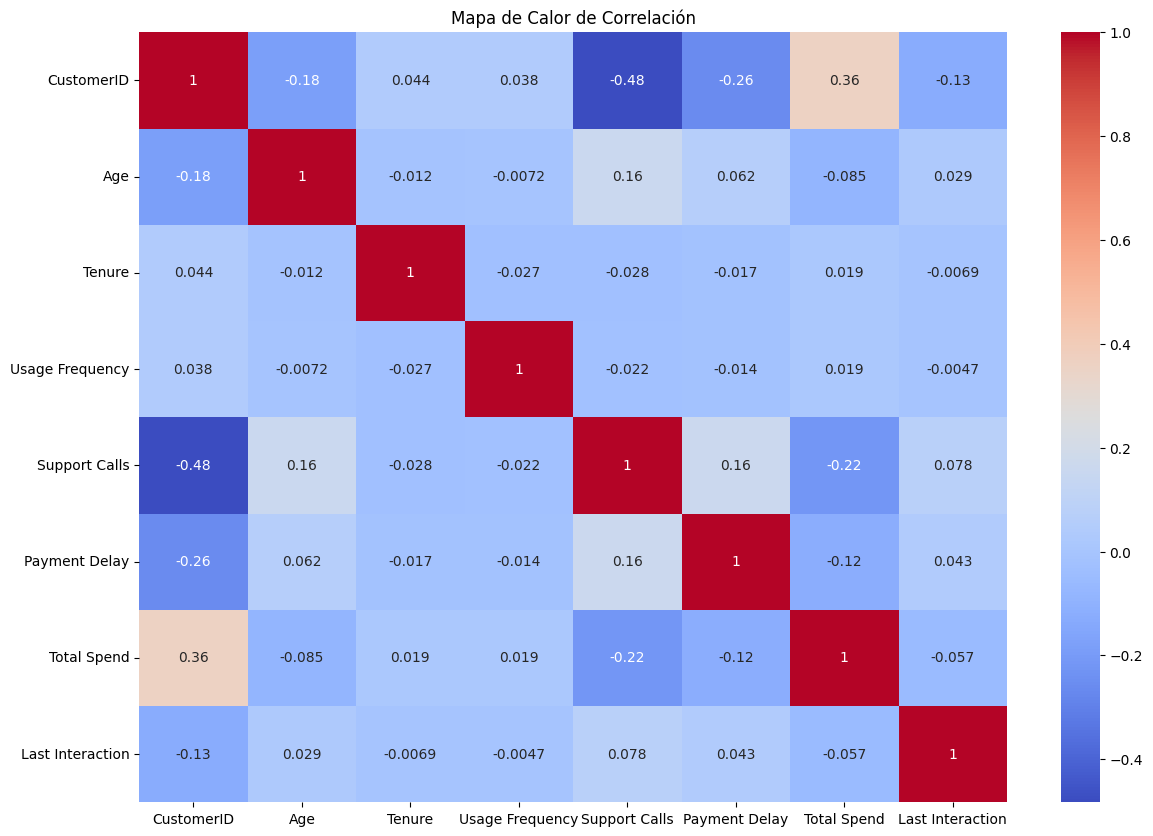

In [56]:
# Mapas de calor 

# Generar el mapa de calor 
plt.figure(figsize=(14, 10)) 
corr = df_numeric.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.title('Mapa de Calor de Correlación')
plt.show()

#Obs: teniendo en cuenta que la variable objetivo es la columna Churn, se puede ver que las correlaciones más fuertes se presentan con las variables: Support Calls, Payment Delay y Age respectivamente.

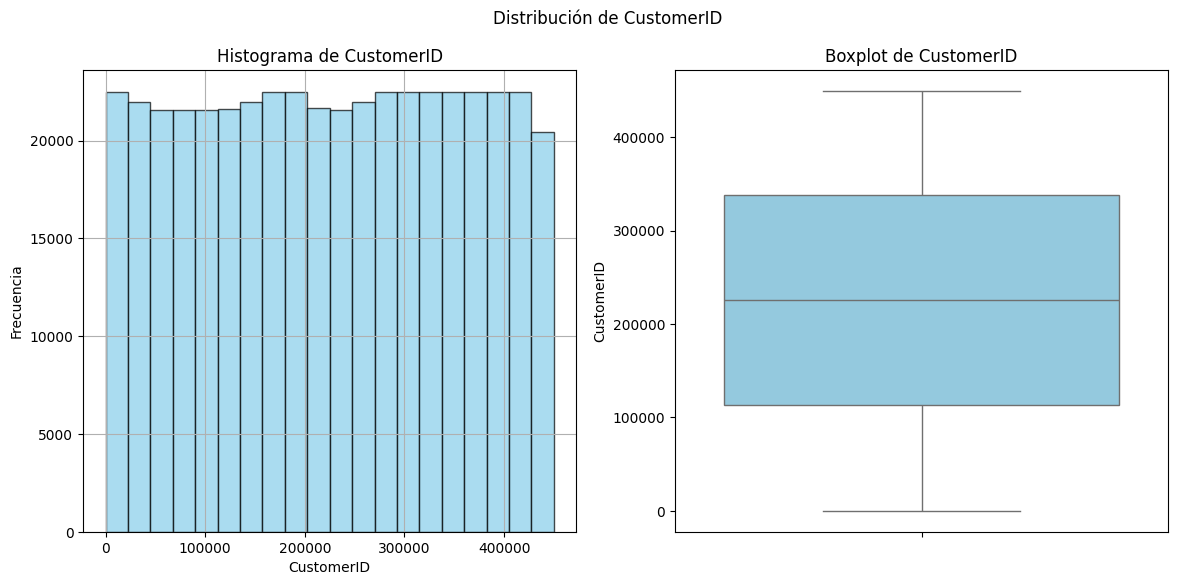

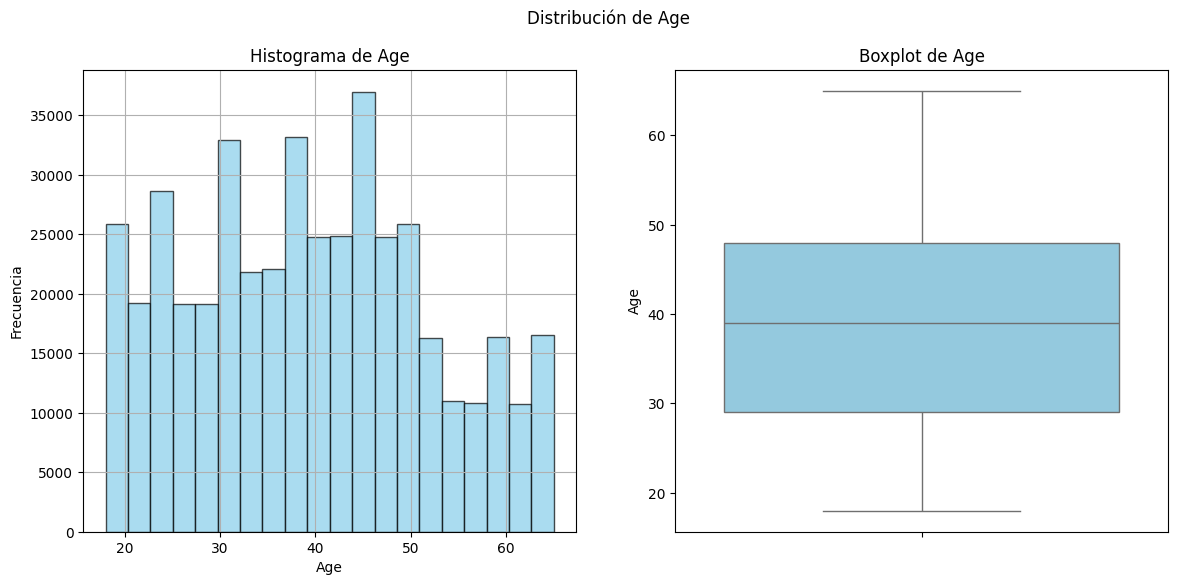

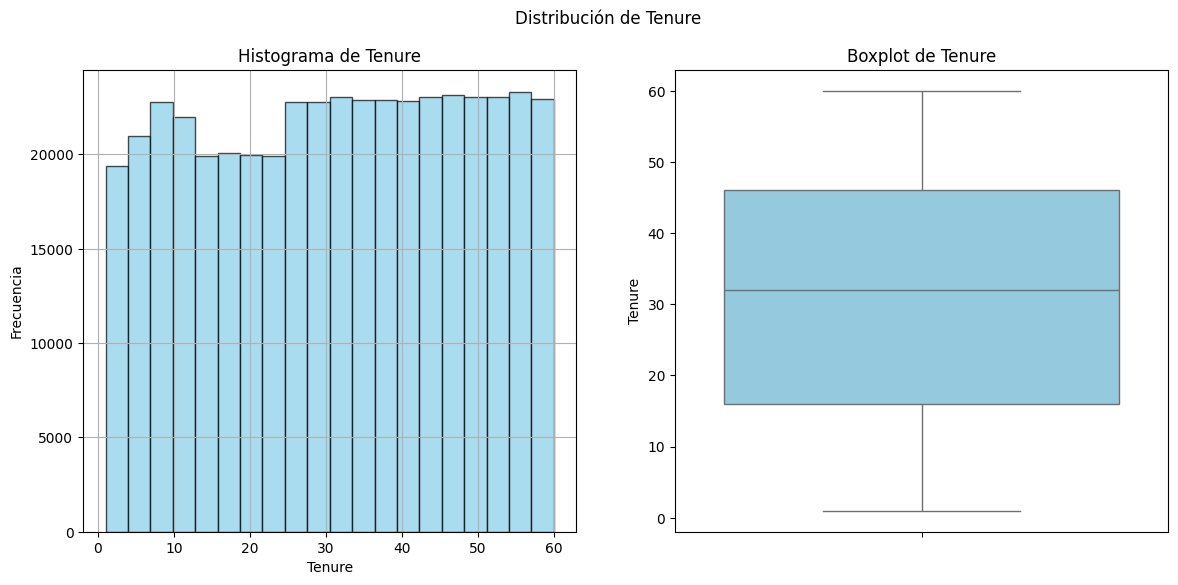

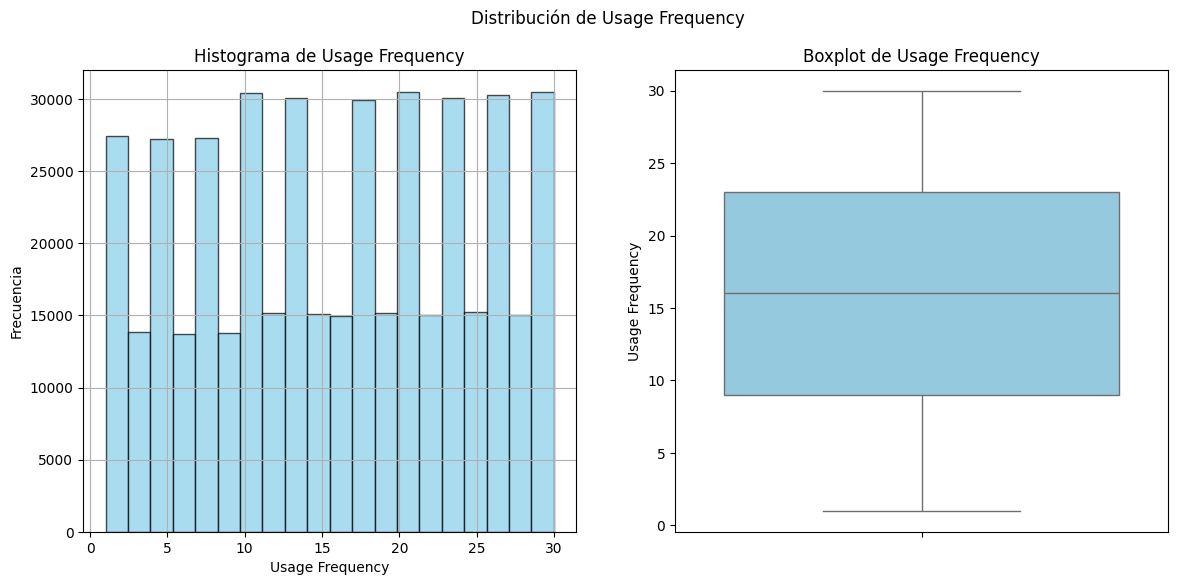

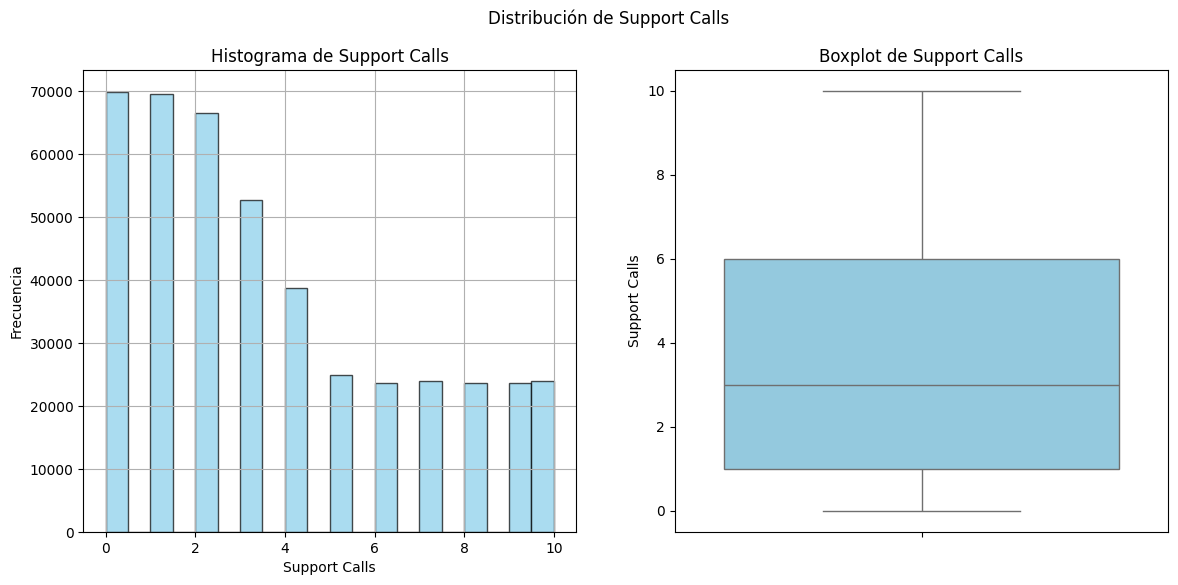

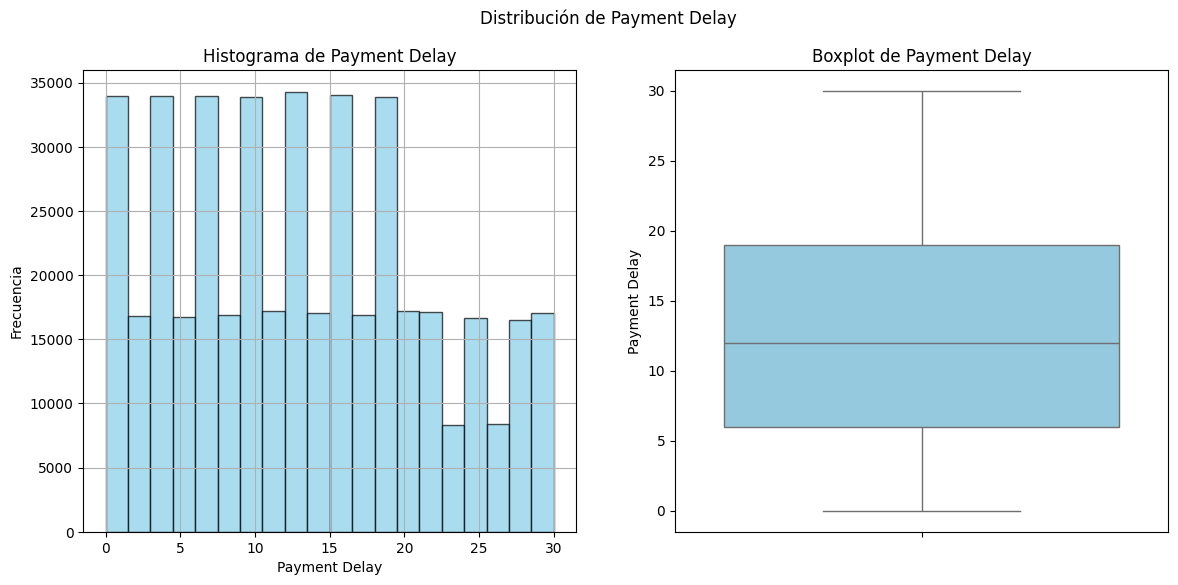

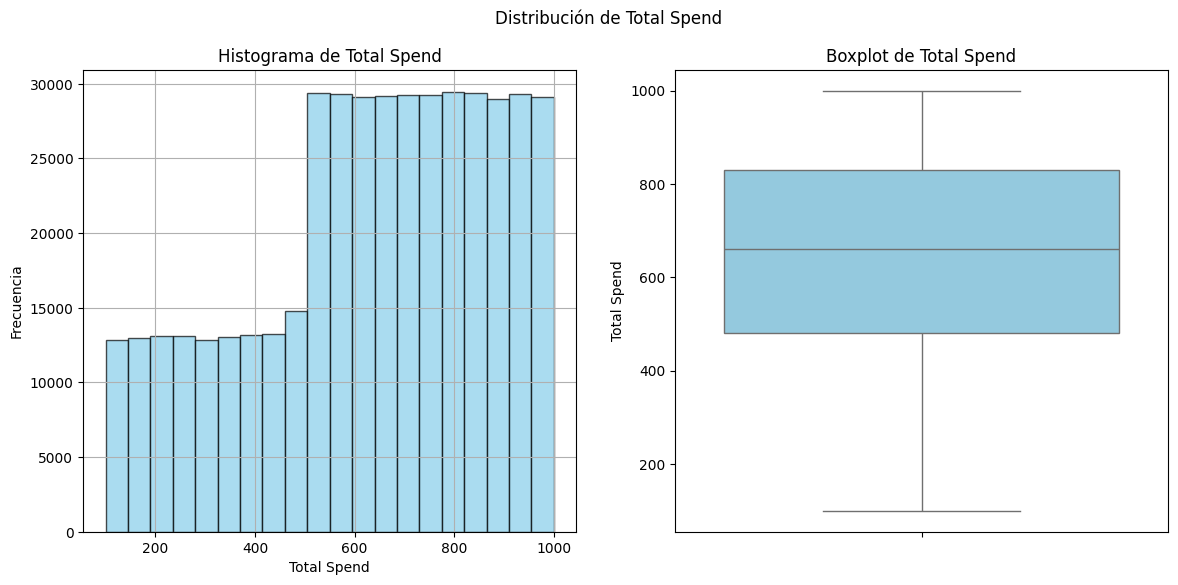

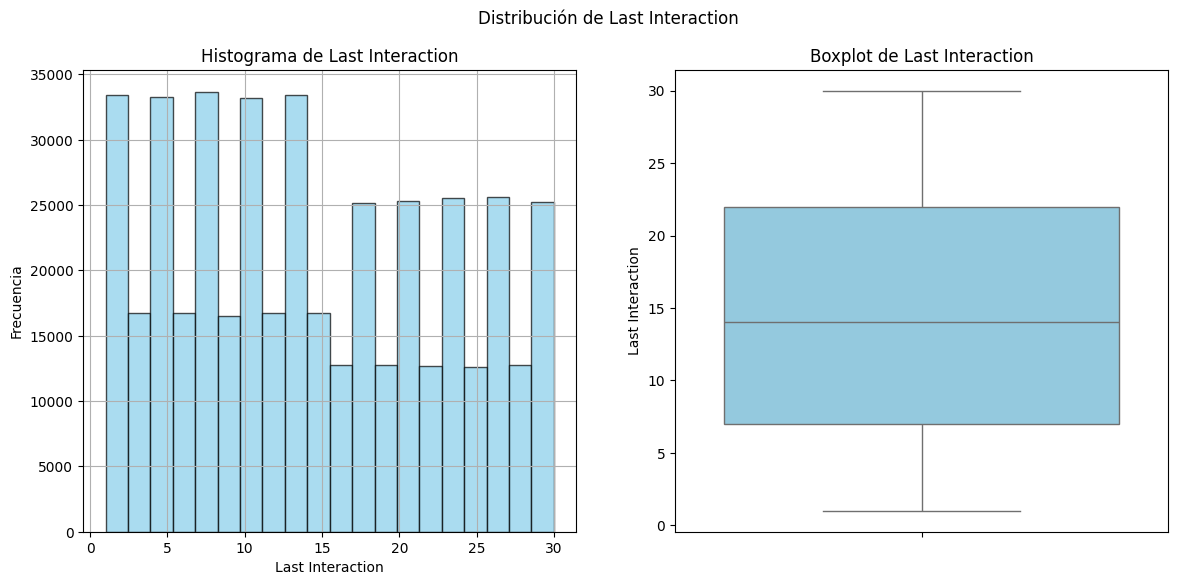

In [57]:
# Historigramas y boxplots para valores numéricos
variables_n = df_numeric
for varn in variables_n:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    # Histograma
    ax[0].hist(df_numeric[varn], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax[0].set_title(f'Histograma de {varn}')
    ax[0].set_xlabel(varn)
    ax[0].set_ylabel('Frecuencia')
    ax[0].grid(True)
    
    # Boxplot
    sns.boxplot(y=df_numeric[varn], color='skyblue', ax=ax[1])
    ax[1].set_title(f'Boxplot de {varn}')
    ax[1].set_ylabel(varn)
    
    plt.suptitle(f'Distribución de {varn}')
    plt.show()

#Obs: No se aprecian outliers muy representativos en las variables.

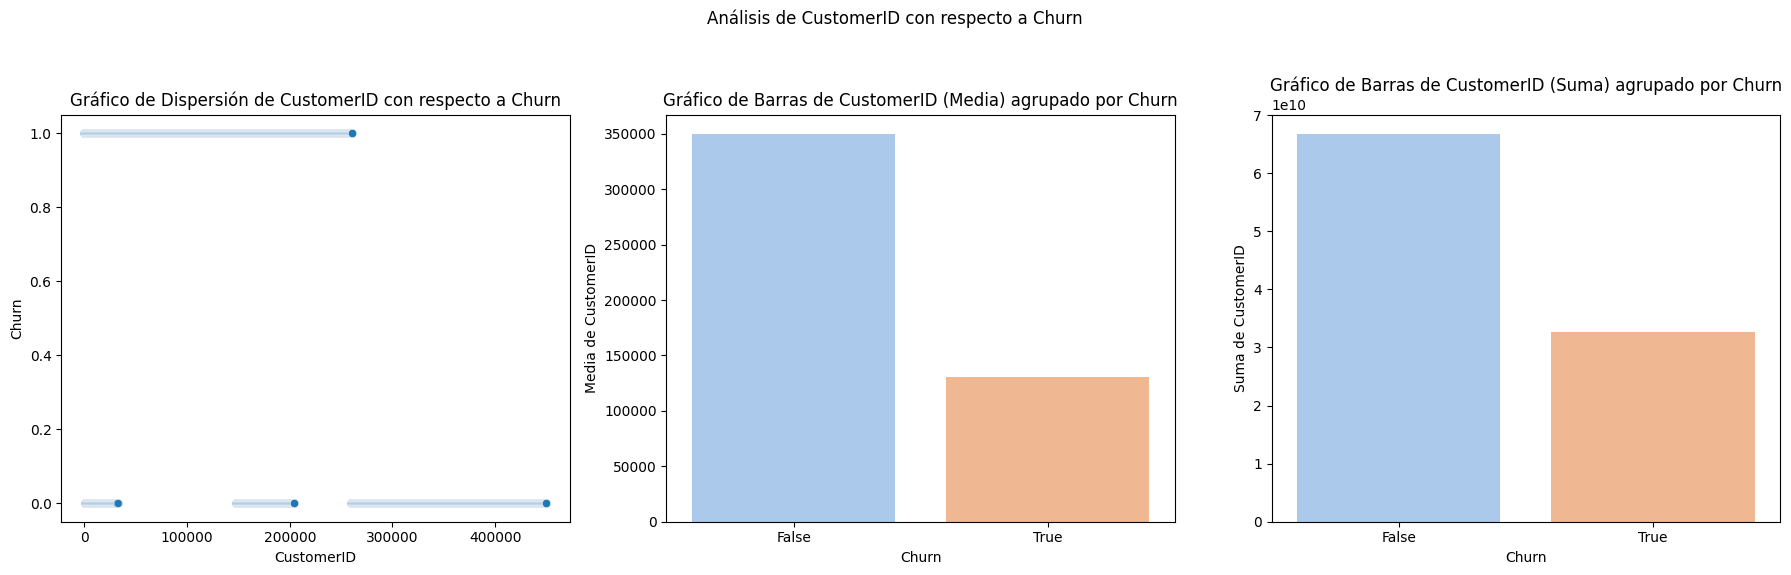

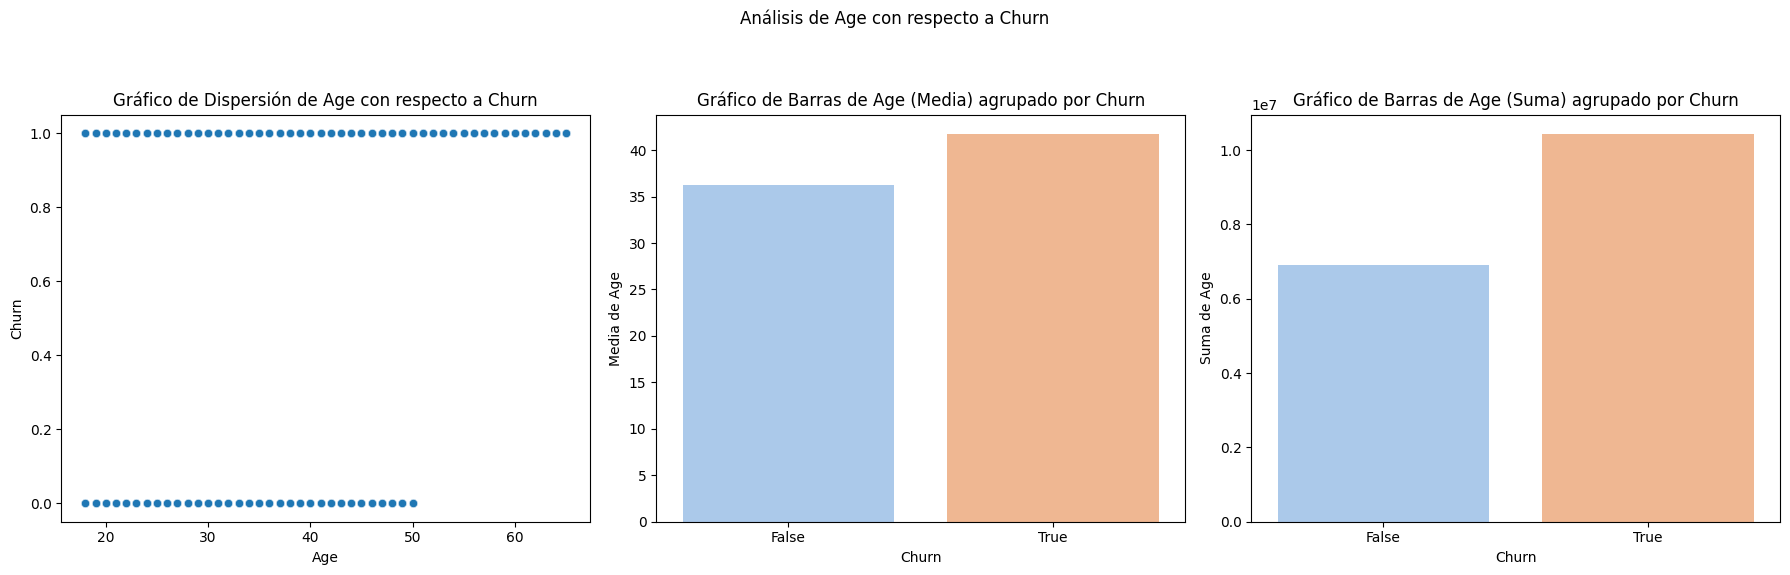

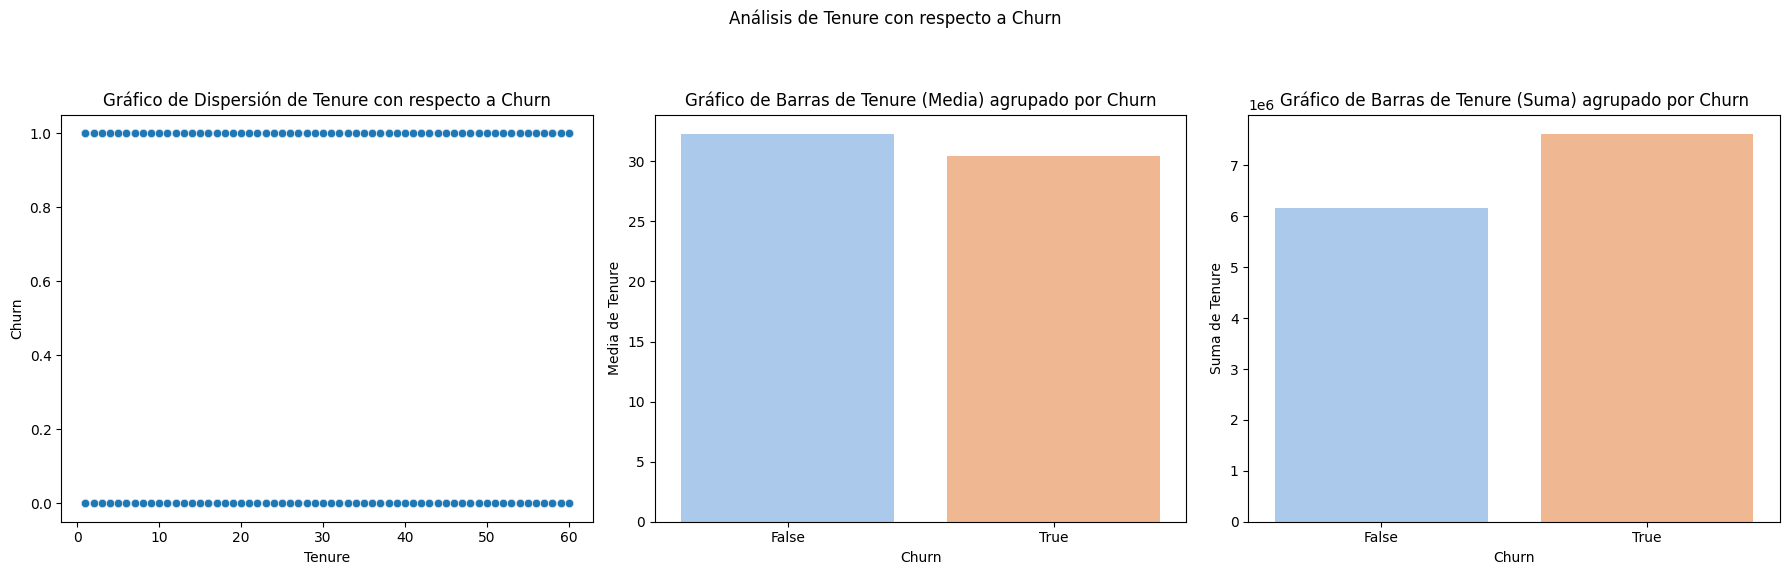

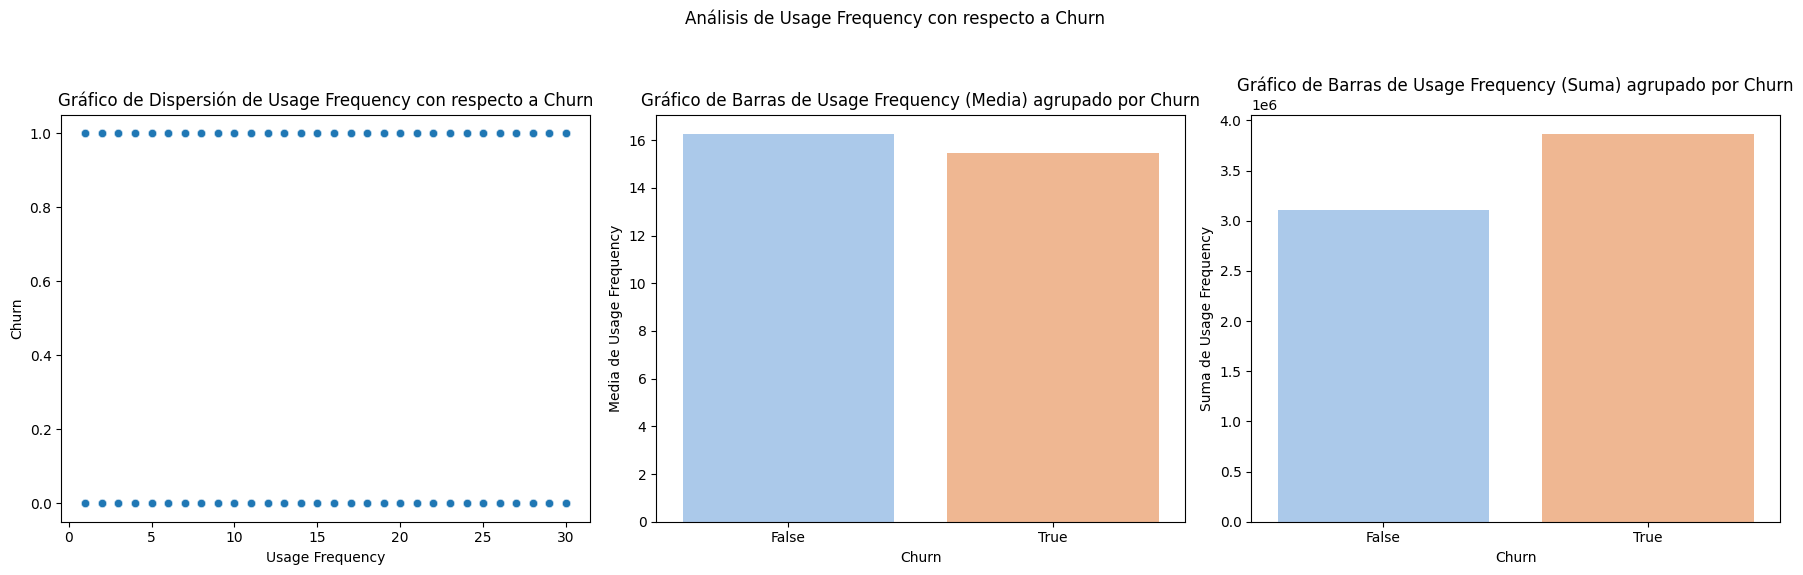

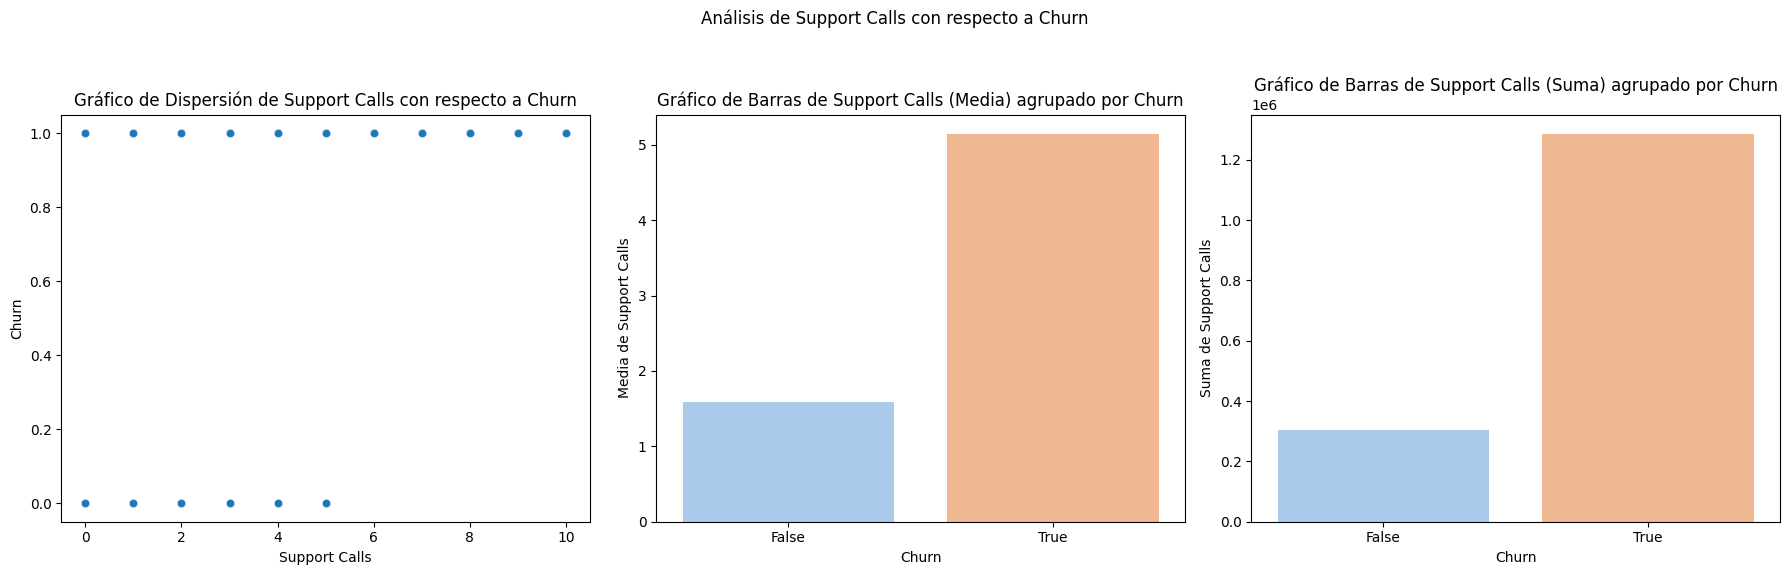

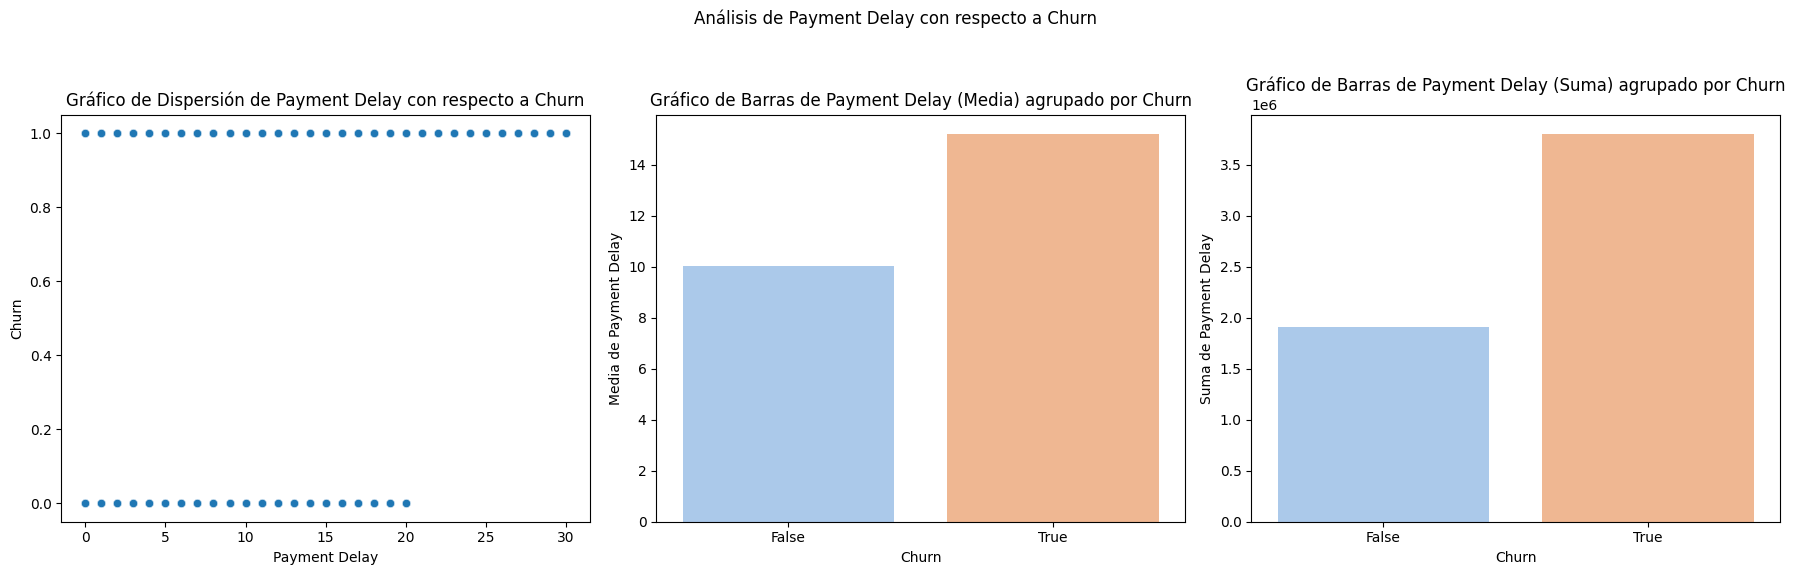

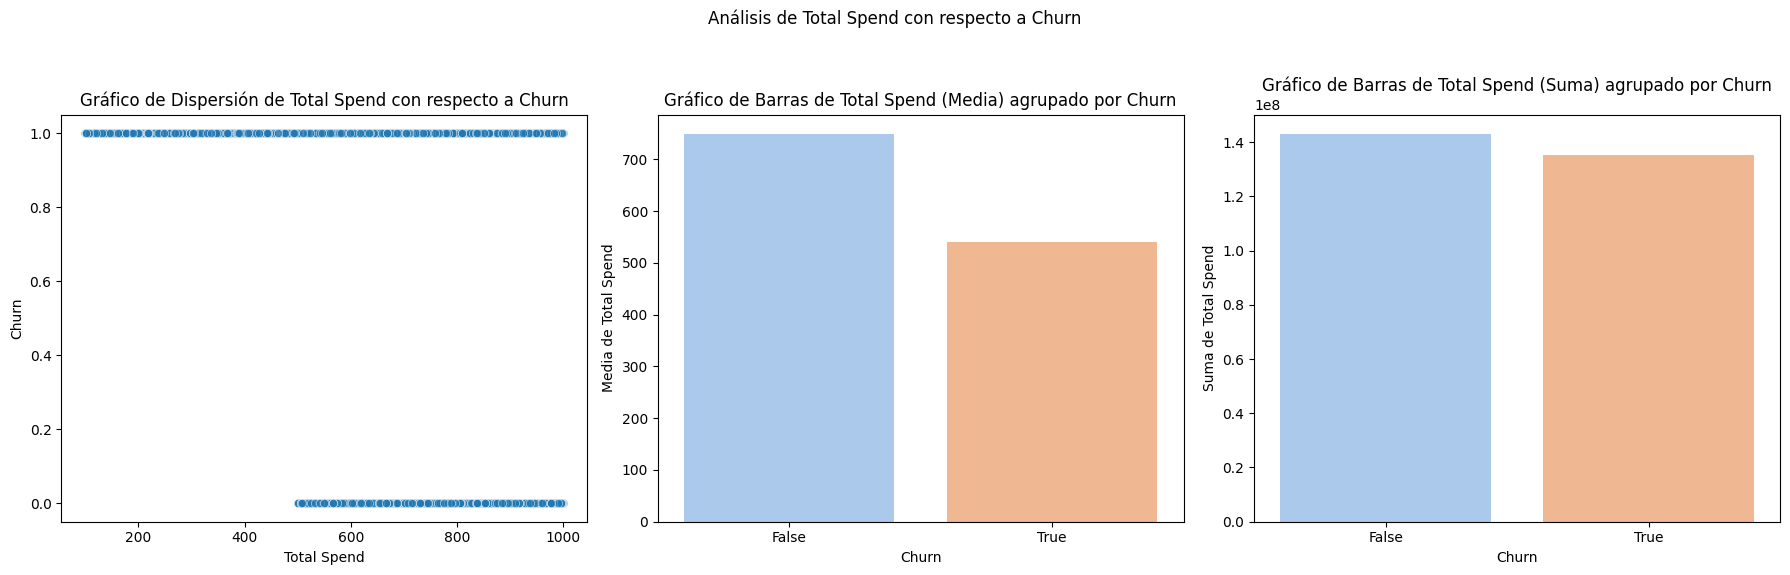

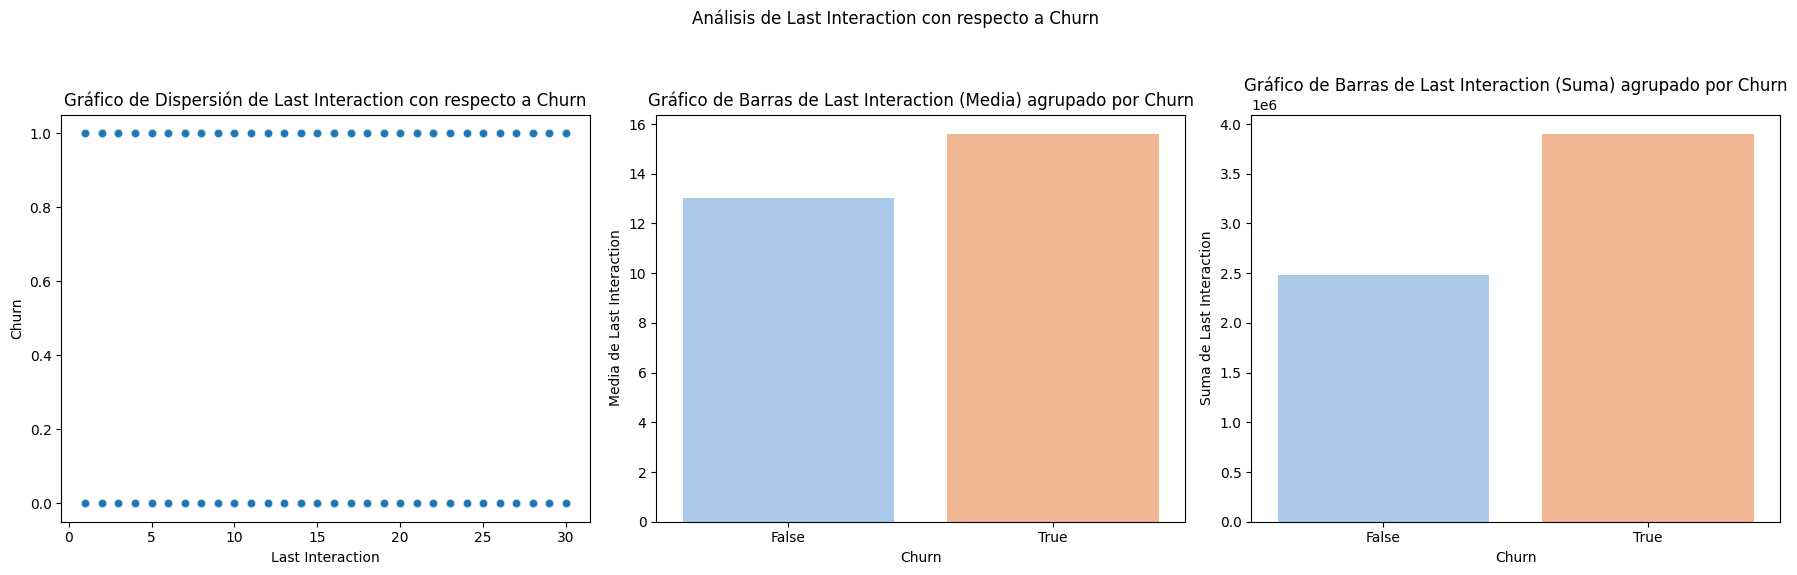

In [58]:
# Suponiendo que df_1numeric contiene las variables numéricas y df tiene la columna 'Churn'
variables_n = df_numeric.columns

# Excluir la variable 'Churn' de las variables numéricas
variables_n = [varn for varn in variables_n if varn != 'Churn']

for varn in variables_n:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Gráfico de dispersión
    sns.scatterplot(x=df[varn], y=df['Churn'], alpha=0.7, ax=axes[0])
    axes[0].set_title(f'Gráfico de Dispersión de {varn} con respecto a Churn')
    axes[0].set_xlabel(varn)
    axes[0].set_ylabel('Churn')
    
    # Gráfico de barras (media)
    df_grouped = df.groupby('Churn')[varn].mean().reset_index()
    sns.barplot(x='Churn', y=varn, hue='Churn', data=df_grouped, palette='pastel', ax=axes[1], legend=False)
    axes[1].set_title(f'Gráfico de Barras de {varn} (Media) agrupado por Churn')
    axes[1].set_xlabel('Churn')
    axes[1].set_ylabel(f'Media de {varn}')
    
    # Gráfico de barras (suma)
    df_grouped_sum = df.groupby('Churn')[varn].sum().reset_index()
    sns.barplot(x='Churn', y=varn, hue='Churn', data=df_grouped_sum, palette='pastel', ax=axes[2], legend=False)
    axes[2].set_title(f'Gráfico de Barras de {varn} (Suma) agrupado por Churn')
    axes[2].set_xlabel('Churn')
    axes[2].set_ylabel(f'Suma de {varn}')
    
    plt.suptitle(f'Análisis de {varn} con respecto a Churn')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



Implementación de Modelos:
Modelos de Clasificación: Implementa modelos de Adaboost y XGBoost.
Optimización de Modelos: Utiliza RandomizedSearchCV para optimizar los hiperparámetros de los modelos.
Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [59]:
# Asegúrate de que la columna 'Churn' es de tipo entero
#df['Churn'] = df['Churn'].astype(int)

# Dividir los datos en características (X) y etiqueta (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)


X Train :  (330624, 11)
X Test  :  (110208, 11)
Y Train :  (330624,)
Y Test  :  (110208,)


Obs: Se decidió no implementar el modelo SVM debido a la sobrecarga que genera. Sin embargo, en su lugar se implementó el modelo AdaBoost.

In [60]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


# Seleccionar columnas numéricas y categóricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object', 'category']).columns

# Crear transformadores para las características numéricas y categóricas
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Crear un preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    remainder='passthrough'
)

# Crear pipelines para SVM, XGBoost y AdaBoost
#pipeline_svm = Pipeline(steps=[
#    ('preprocessor', preprocessor),
#    ('classifier', SVC(probability=True, random_state=42))
#])

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_ada = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluación de AdaBoost:
Accuracy: 0.9970782520325203
Precision: 0.9970138766906728
Recall: 0.9978424509756916
F1-Score: 0.9974279917567934
ROC-AUC: 0.9999750680607019
Confusion Matrix:
[[47450   187]
 [  135 62436]]


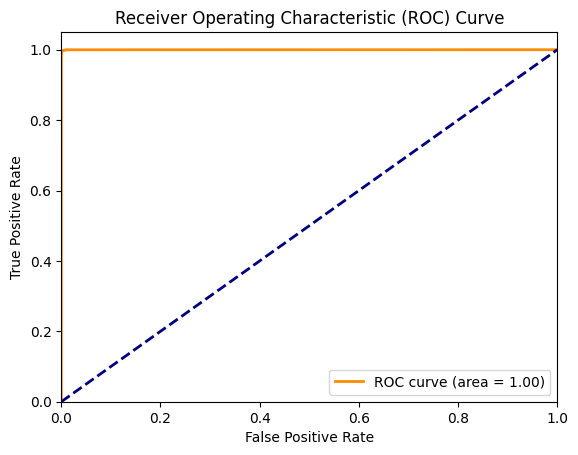

Evaluación de XGBoost:
Accuracy: 0.9999364837398373
Precision: 0.9999200946079841
Recall: 0.999968036310751
F1-Score: 0.9999440648847338
ROC-AUC: 0.9999999567214989
Confusion Matrix:
[[47632     5]
 [    2 62569]]


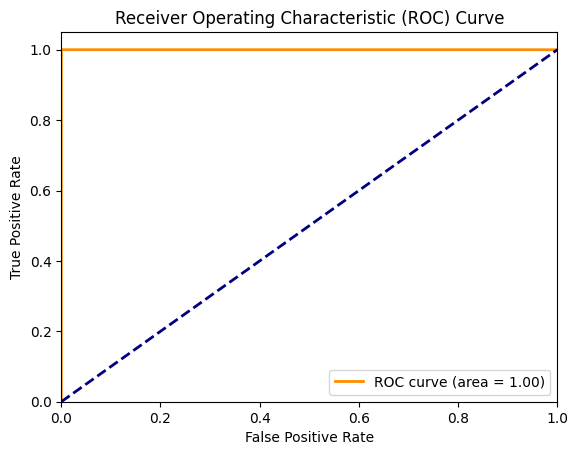

In [61]:
#Evaluar modelos sin optimización


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt



# Función para evaluar el modelo
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Mostrar métricas
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Graficar Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Entrenar y evaluar AdaBoost
pipeline_ada.fit(X_train, y_train)
print("Evaluación de AdaBoost:")
evaluar_modelo(pipeline_ada, X_test, y_test)

# Entrenar y evaluar XGBoost
pipeline_xgb.fit(X_train, y_train)
print("Evaluación de XGBoost:")
evaluar_modelo(pipeline_xgb, X_test, y_test)


Comparación de Rendimiento:
AdaBoost:
Accuracy: 0.9970782520325203
Precision: 0.9970138766906728
Recall: 0.9978424509756916
F1-Score: 0.9974279917567934
ROC-AUC: 0.9999750680607019
Confusion Matrix:
[[47450   187]
 [  135 62436]]


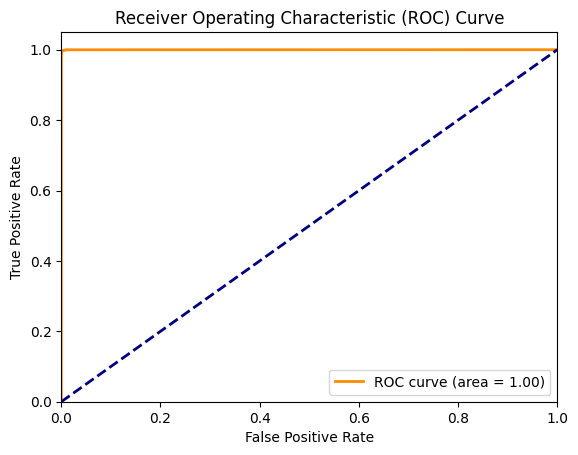


XGBoost:
Accuracy: 0.9999364837398373
Precision: 0.9999200946079841
Recall: 0.999968036310751
F1-Score: 0.9999440648847338
ROC-AUC: 0.9999999567214989
Confusion Matrix:
[[47632     5]
 [    2 62569]]


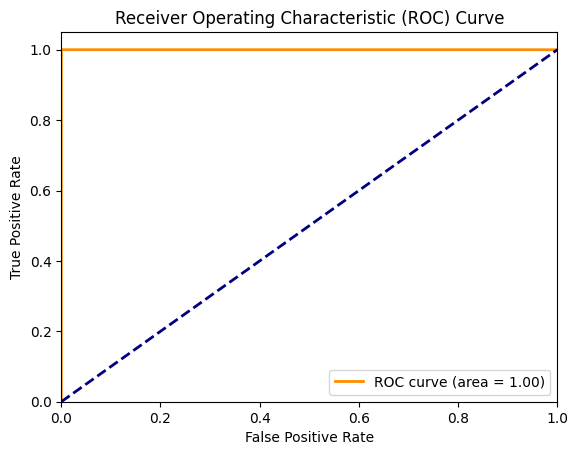

In [62]:
# Comparar las métricas de ambos modelos
print("Comparación de Rendimiento:")
print("AdaBoost:")
evaluar_modelo(pipeline_ada, X_test, y_test)
print("\nXGBoost:")
evaluar_modelo(pipeline_xgb, X_test, y_test)

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Definir espacios de búsqueda para los hiperparámetros
#param_distributions_svm = {
#    'classifier__C': uniform(0.1, 10),
#    'classifier__kernel': ['linear', 'rbf'],
#    'classifier__gamma': ['scale', 'auto']
#}

param_distributions_xgb = {
    'classifier__n_estimators': randint(50, 150),
    'classifier__learning_rate': uniform(0.05, 0.2),
    'classifier__max_depth': randint(3, 7),
    'classifier__subsample': uniform(0.7, 0.3),
    'classifier__colsample_bytree': uniform(0.7, 0.3)
}

param_distributions_ada = { 
    'classifier__n_estimators': randint(50, 150), 
    'classifier__learning_rate': uniform(0.05, 0.5)
}

# Optimización con RandomizedSearchCV para SVM
#random_search_svm = RandomizedSearchCV(pipeline_svm, param_distributions_svm, n_iter=50, cv=5, scoring='roc_auc', random_state=42)
#random_search_svm.fit(X_train, y_train)
#print(f"Mejores parámetros para SVM: {random_search_svm.best_params_}")

# Optimización con RandomizedSearchCV para XGBoost
random_search_xgb = RandomizedSearchCV(pipeline_xgb, param_distributions_xgb, n_iter=20, cv=3, scoring='roc_auc', random_state=42, n_jobs=-1)
random_search_xgb.fit(X_train, y_train)
print(f"Mejores parámetros para XGBoost: {random_search_xgb.best_params_}")

# Optimización con RandomizedSearchCV para AdaBoost 
random_search_ada = RandomizedSearchCV(pipeline_ada, param_distributions_ada, n_iter=20, cv=3, scoring='roc_auc', random_state=42, n_jobs=-1) 
random_search_ada.fit(X_train, y_train) 
print(f"Mejores parámetros para AdaBoost: {random_search_ada.best_params_}")

Mejores parámetros para XGBoost: {'classifier__colsample_bytree': np.float64(0.8123620356542087), 'classifier__learning_rate': np.float64(0.24014286128198326), 'classifier__max_depth': 5, 'classifier__n_estimators': 121, 'classifier__subsample': np.float64(0.8795975452591109)}


c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Mejores parámetros para AdaBoost: {'classifier__learning_rate': np.float64(0.4830880728874676), 'classifier__n_estimators': 149}


Evaluación de AdaBoost Optimizado:
Accuracy: 0.997096399535424
Precision: 0.9970298452645194
Recall: 0.9978584328203162
F1-Score: 0.997443966963273
ROC-AUC: 0.9999765309746864
Confusion Matrix:
[[47451   186]
 [  134 62437]]


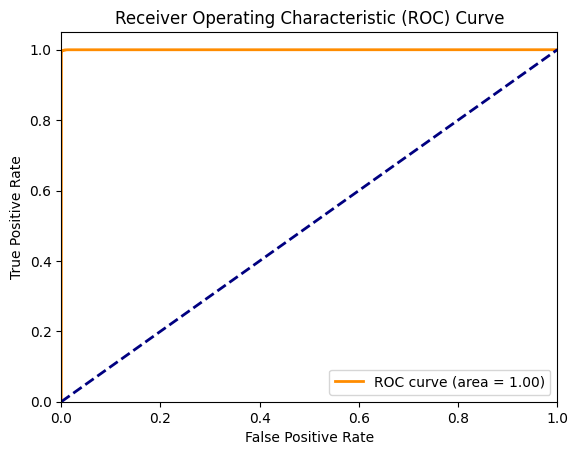

Evaluación de XGBoost Optimizado:
Accuracy: 0.9999455574912892
Precision: 0.999920095884938
Recall: 0.9999840181553755
F1-Score: 0.9999520559985936
ROC-AUC: 0.9999999637668363
Confusion Matrix:
[[47632     5]
 [    1 62570]]


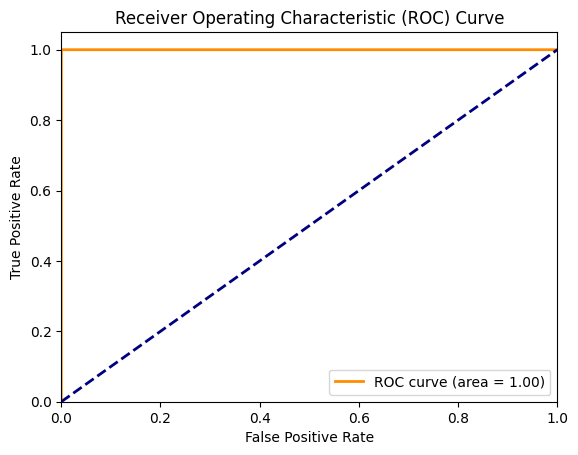

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

# Función para evaluar el modelo
def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Mostrar métricas
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    # Graficar Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Evaluar AdaBoost optimizado
print("Evaluación de AdaBoost Optimizado:")
evaluar_modelo(random_search_ada, X_test, y_test)

# Evaluar XGBoost optimizado
print("Evaluación de XGBoost Optimizado:")
evaluar_modelo(random_search_xgb, X_test, y_test)


Comparación de Rendimiento:
AdaBoost:
Accuracy: 0.997096399535424
Precision: 0.9970298452645194
Recall: 0.9978584328203162
F1-Score: 0.997443966963273
ROC-AUC: 0.9999765309746864
Confusion Matrix:
[[47451   186]
 [  134 62437]]


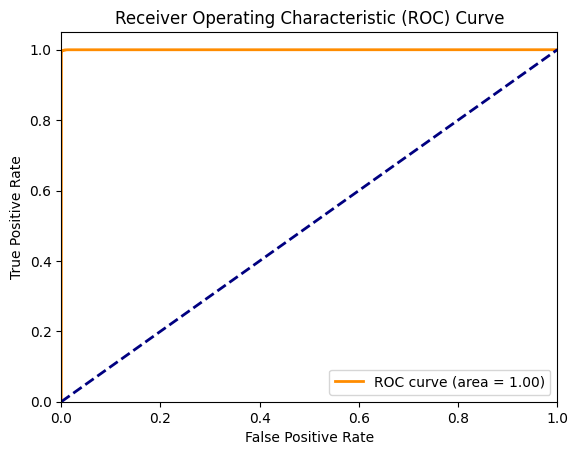


XGBoost:
Accuracy: 0.9999455574912892
Precision: 0.999920095884938
Recall: 0.9999840181553755
F1-Score: 0.9999520559985936
ROC-AUC: 0.9999999637668363
Confusion Matrix:
[[47632     5]
 [    1 62570]]


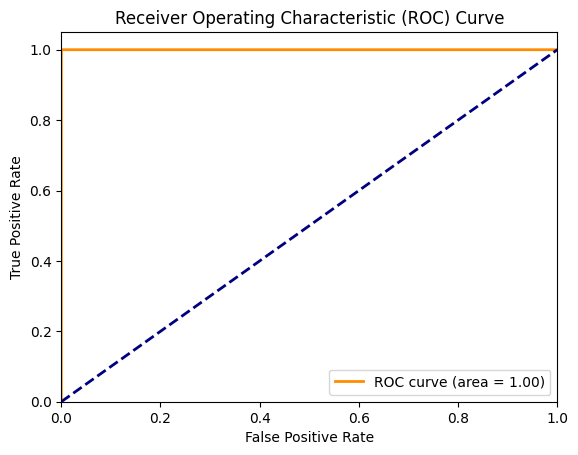

In [65]:
# Comparar las métricas de ambos modelos
print("Comparación de Rendimiento:")
print("AdaBoost:")
evaluar_modelo(random_search_ada, X_test, y_test)
print("\nXGBoost:")
evaluar_modelo(random_search_xgb, X_test, y_test)


Comparación y Discusión
XGBoost supera consistentemente a AdaBoost en todas las métricas, tanto antes como después de la optimización.

Los modelos optimizados muestran solo mejoras marginales con respecto a sus versiones sin optimización, lo que sugiere que ambos modelos ya funcionan extremadamente bien con los parámetros predeterminados.

XGBoost es notablemente robusto, con un rendimiento casi perfecto en todas las métricas, lo que lo hace más adecuado para este dataset dado su alto poder predictivo y discriminatorio.

La ROC-AUC extremadamente alta en ambos modelos sugiere que ambos modelos son muy buenos para distinguir entre las clases positivas y negativas.

Estos resultados indican que, si bien la optimización de hiperparámetros puede proporcionar mejoras, la elección del modelo (en este caso, XGBoost) tiene un impacto más significativo en el rendimiento. En resumen, XGBoost es la mejor elección para este dataset.